## Linear regression model on Boston housing dataset

In [3]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

# Define the full path to your CSV file with the correct filename
file_path = r"C:\Users\admin\Downloads\gitehub\HousingData.csv"

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head()) # Display the first few rows to confirm
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please double-check the path and filename. Make sure 'HousingData.csv' is exactly as spelled and located in that folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [8]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
 data.shape

(506, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


 The dataset contains 506 entries and 14 columns, with 6 columns (CRIM, ZN, INDUS,
 CHAS, AGE, LSTAT) having 20 missing values each.
 Most columns are continuous (float64), while RAD and TAX are discrete (int64).
 MEDV (median home value) is the target variable, likely influenced by features like RM
 (average rooms) and LSTAT (lower-status population).
 Missing values need to be addressed through imputation or by dropping rows with
 missing data.
 Exploratory analysis and modeling can help understand feature relationships and
 predict MEDV

In [11]:
data.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [14]:

data.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,   nan,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,
        22. ,  20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [15]:
data.CHAS.unique()

array([ 0., nan,  1.])

Data Cleaning
 Checking Null values

In [17]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [18]:
 data.duplicated().sum()


np.int64(0)

In [19]:
df = data.copy()

In [20]:
 df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
 df['ZN'].fillna(df['ZN'].mean(), inplace=True)
 df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
 df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
 df['AGE'].fillna(df['AGE'].median(), inplace=True)  # Median is often preferred for
 df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

In [21]:
 df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
 df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [23]:
df['CHAS'] = df['CHAS'].astype('int')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.80000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


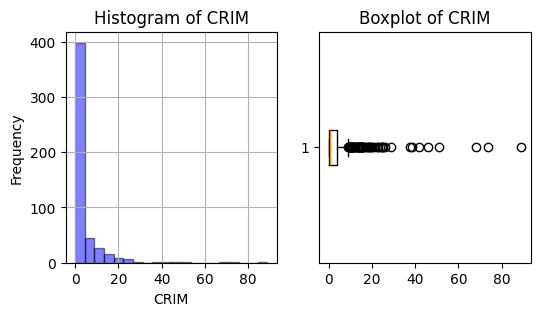

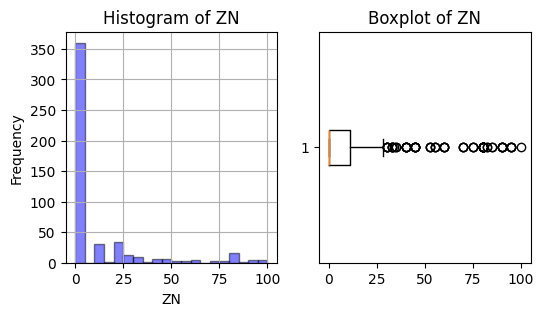

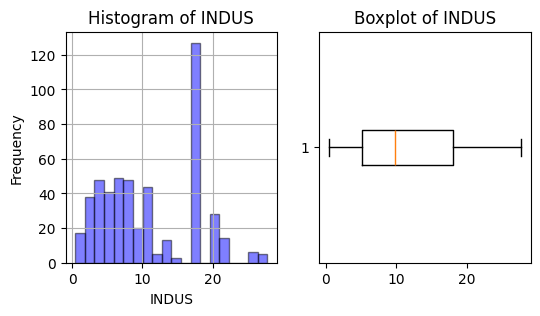

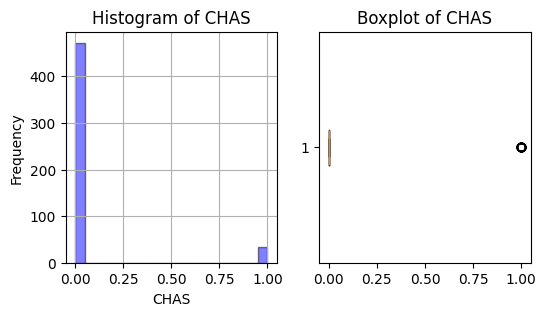

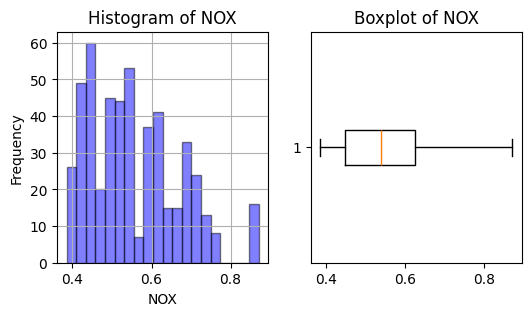

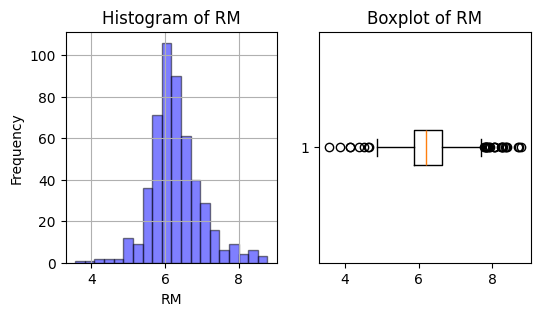

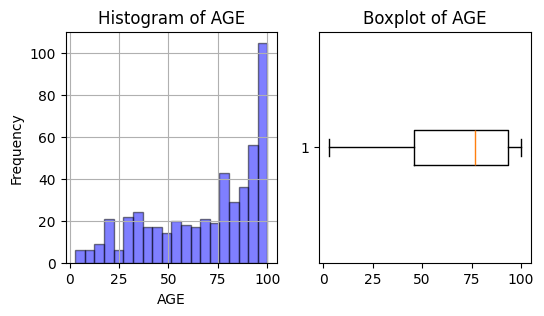

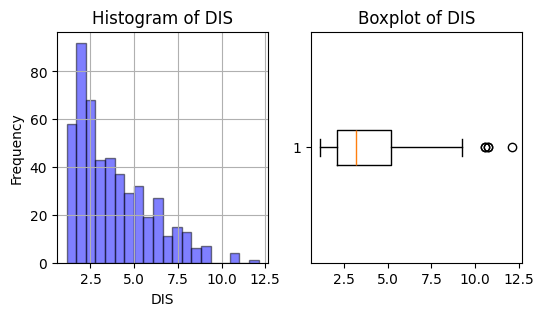

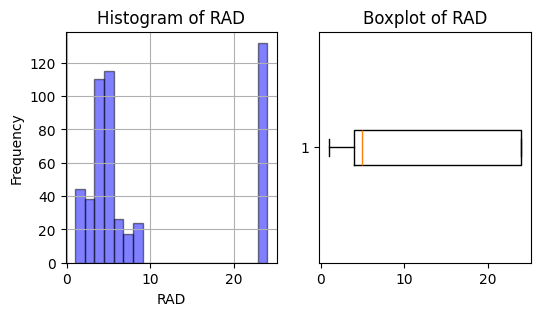

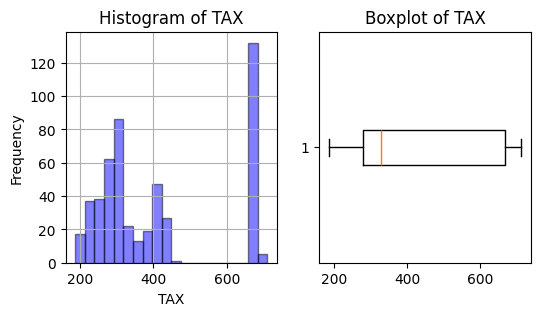

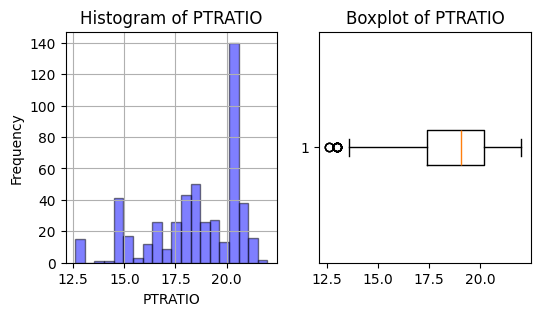

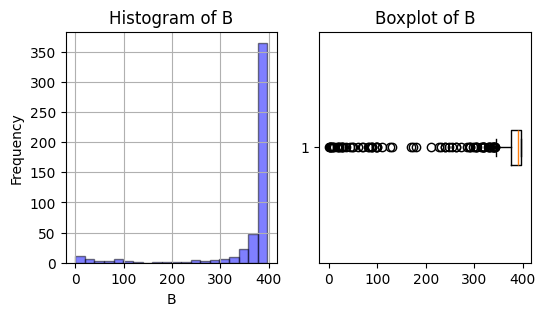

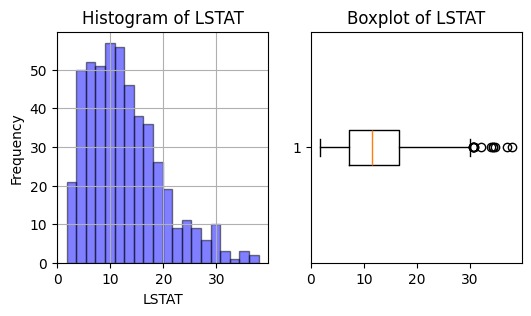

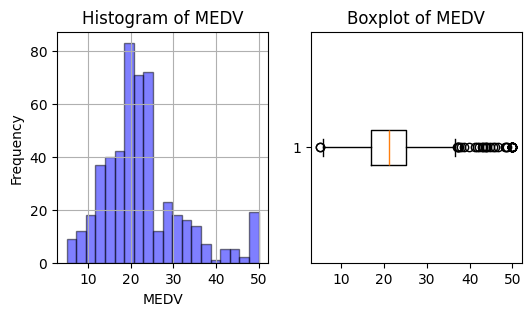

In [25]:
for i in df.columns:
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    df[i].hist(bins=20, alpha=0.5, color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.boxplot(df[i], vert=False)
    plt.title(f'Boxplot of {i}')
    plt.show()

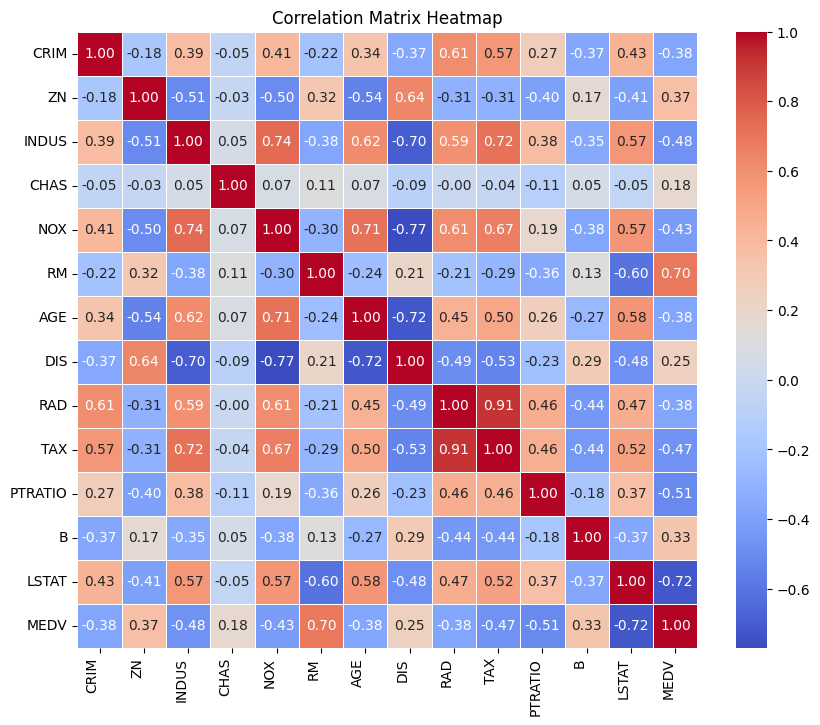

In [26]:
 corr = df.corr(method='pearson')
 plt.figure(figsize=(10, 8))
 sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
 plt.xticks(rotation=90, ha='right')
 plt.yticks(rotation=0)
 plt.title("Correlation Matrix Heatmap")
 plt.show()

In [27]:
 X = df.drop('MEDV', axis=1)  # All columns except 'MEDV'
 y = df['MEDV']  # Target variable

StandardScaler

In [30]:
# Scale the features
scale = StandardScaler()
X_scaled  = scale.fit_transform(X)

In [33]:
# Assuming X_scaled and y are already defined from your data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
 # Initialize the linear regression model
 model = LinearRegression()
 # Fit the model on the training data
 model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
 # Predict on the test set
 y_pred = model.predict(X_test)
 y_pred

array([28.99719439, 36.56606809, 14.51022803, 25.02572187, 18.42885474,
       23.02785726, 17.95437605, 14.5769479 , 22.14430832, 20.84584632,
       25.15283588, 18.55925182, -5.69168071, 21.71242445, 19.06845707,
       25.94275348, 19.70991322,  5.85916505, 40.9608103 , 17.21528576,
       25.36124981, 30.26007975, 11.78589412, 23.48106943, 17.35338161,
       15.13896898, 21.61919056, 14.51459386, 23.17246824, 19.40914754,
       22.56164985, 25.21208496, 25.88782605, 16.68297496, 16.44747174,
       16.65894826, 31.10314158, 20.25199803, 24.38567686, 23.09800032,
       14.47721796, 32.36053979, 43.01157914, 17.61473728, 27.60723089,
       16.43366912, 14.25719607, 26.0854729 , 19.75853278, 30.15142187,
       21.01932313, 33.72128781, 16.39180467, 26.36438908, 39.75793372,
       22.02419633, 18.39453126, 32.81854401, 25.370573  , 12.82224665,
       22.76128341, 30.73955199, 31.34386371, 16.27681305, 20.36945226,
       17.23156773, 20.15406451, 26.15613066, 30.92791361, 11.42

In [36]:
 # Calculate Mean Squared Error
 mse = mean_squared_error(y_test, y_pred)
 # Calculate Root Mean Squared Error (RMSE)
 rmse = np.sqrt(mse)
 # Calculate R-squared value
 r2 = r2_score(y_test, y_pred)
 print(f'Mean Squared Error: {mse}')
 print(f'Root Mean Squared Error: {rmse}')
 print(f'R-squared: {r2}')

Mean Squared Error: 24.944071172175562
Root Mean Squared Error: 4.994403985679929
R-squared: 0.6598556613717499


##   Polynomial Regression for MPG Dataset for vehicle fuel efficiency prediction

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [40]:
 import warnings
 warnings.filterwarnings("ignore")

In [41]:
 sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [42]:
 data = sns.load_dataset('mpg')

In [43]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [44]:
 data.shape

(398, 9)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [46]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [47]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

Data Cleaning"

In [49]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [50]:
data.duplicated().sum()

np.int64(0)

In [51]:
df = data.copy()

In [53]:
# Data Handling
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [54]:
 # Discriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [56]:
#  EDA
numerical = df.select_dtypes(include=['int','float']).columns
categorical = df.select_dtypes(include=['object']).columns
print(numerical)
print(categorical)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')
Index(['origin', 'name'], dtype='object')


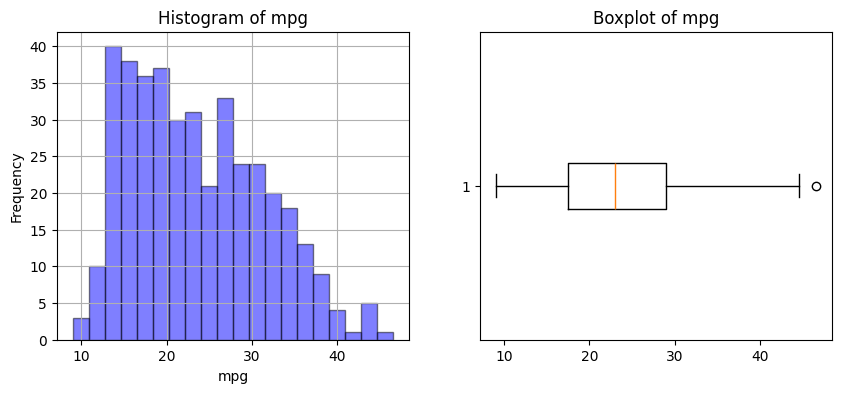

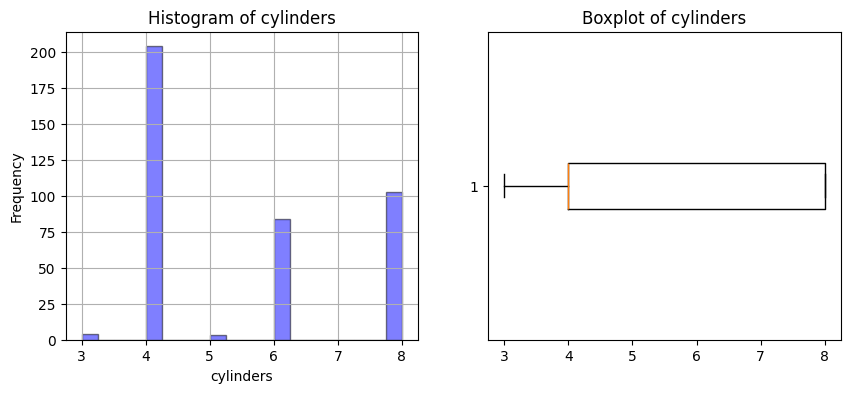

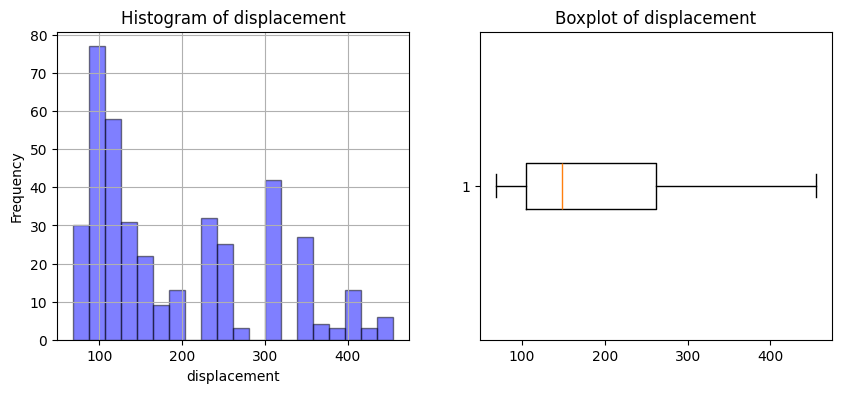

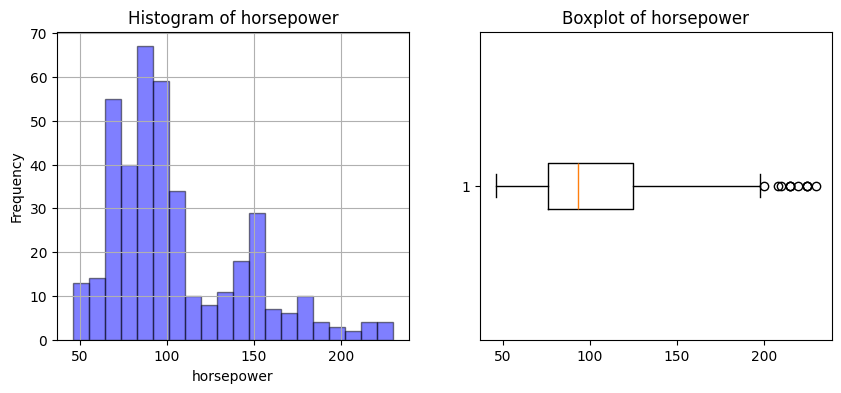

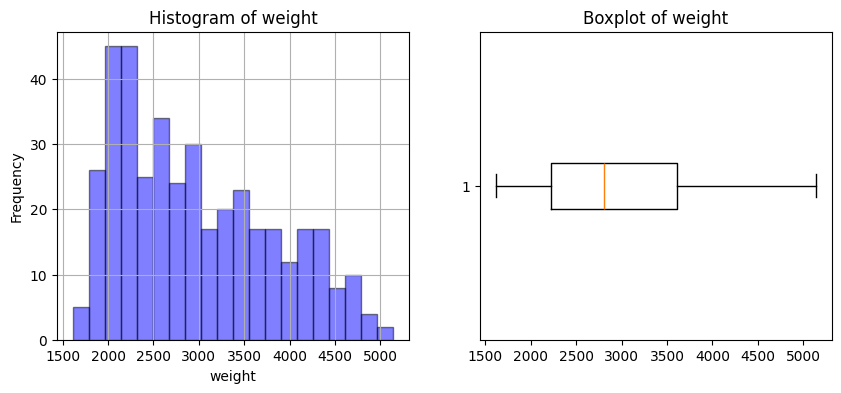

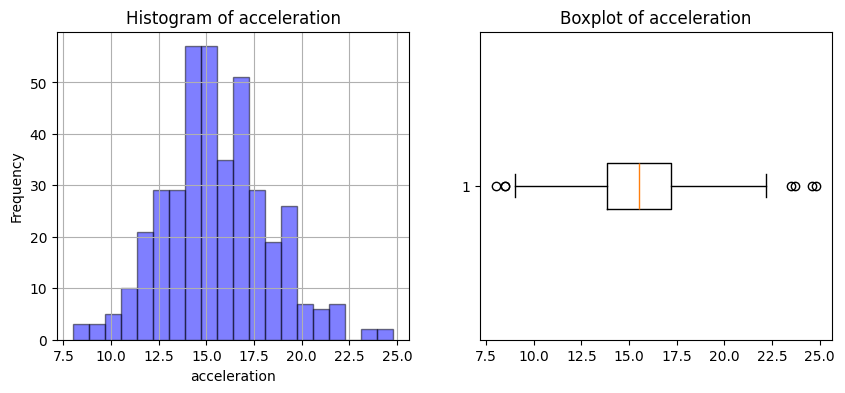

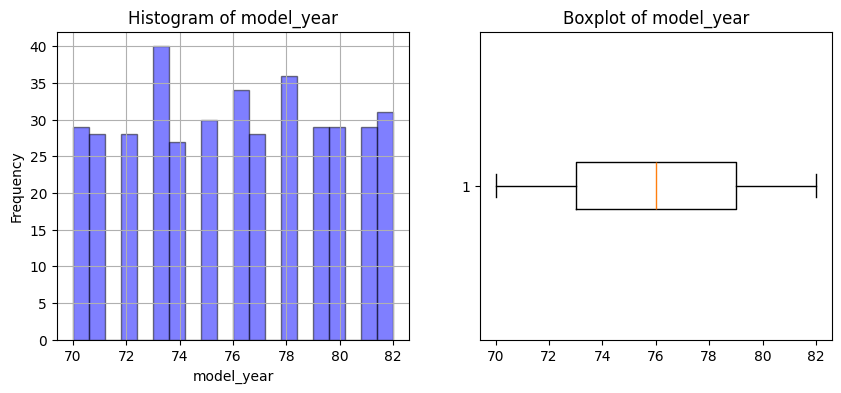

In [57]:
for i in numerical:
 plt.figure(figsize=(10,4))
 plt.subplot(1, 2, 1)
 df[i].hist(bins=20, alpha=0.5, color='b',edgecolor='black')
 plt.title(f'Histogram of {i}')
 plt.xlabel(i)
 plt.ylabel('Frequency')
 plt.subplot(1, 2, 2)
 plt.boxplot(df[i], vert=False)
 plt.title(f'Boxplot of {i}')
 plt.show()

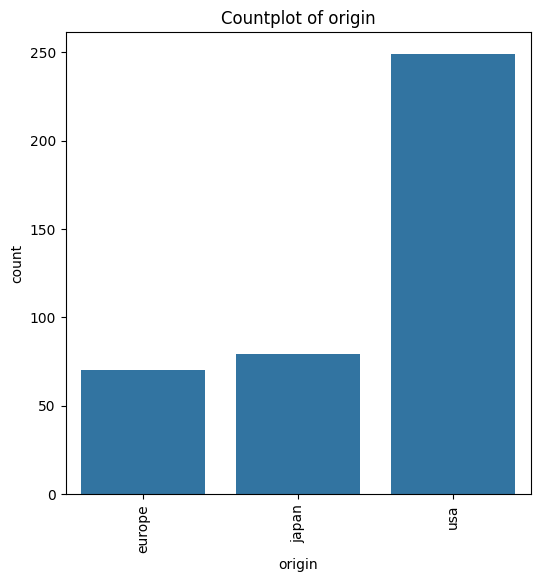

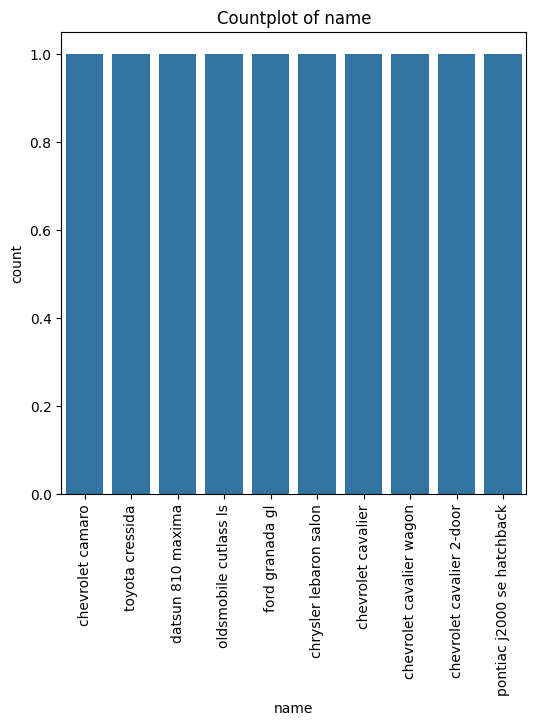

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in categorical:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().sort_values().head(10).index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

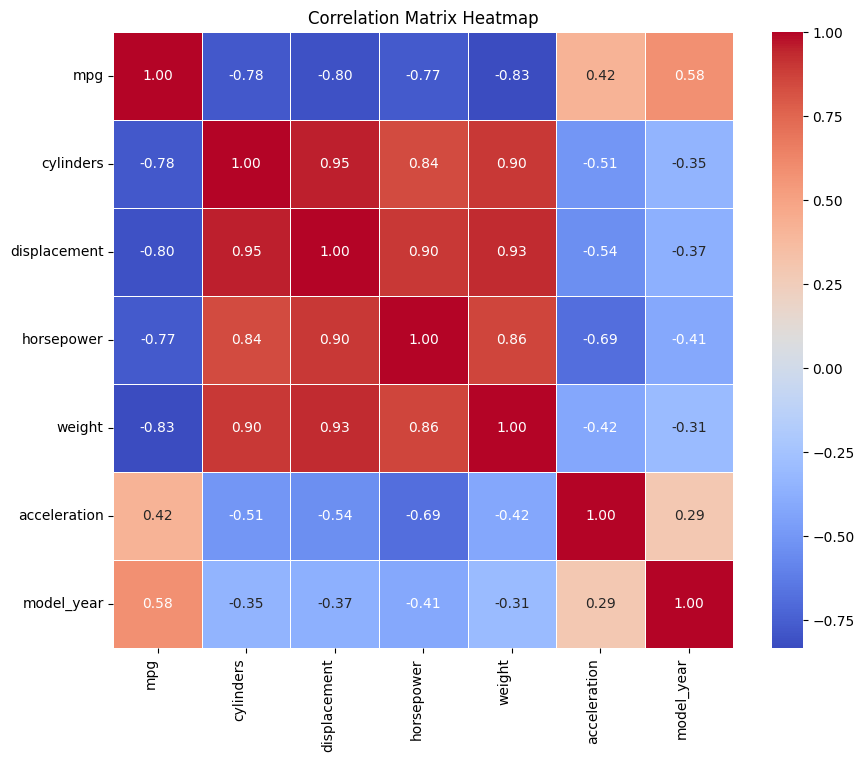

In [64]:
 corr_data = df[numerical].corr(method='pearson')
 plt.figure(figsize=(10, 8))
 sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
 plt.xticks(rotation=90, ha='right')
 plt.yticks(rotation=0)
 plt.title("Correlation Matrix Heatmap")
 plt.show()

In [66]:
# Select the relevant features
X = df[['horsepower']]  # You can select other features here
y = df['mpg']

In [67]:
 # Split the data into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
 # Create polynomial features
 degree = 2  # Change the degree of the polynomial
 poly = PolynomialFeatures(degree)
 X_poly_train = poly.fit_transform(X_train)

In [71]:
 # Fit a polynomial regression model
 model = LinearRegression()
model.fit(X_poly_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

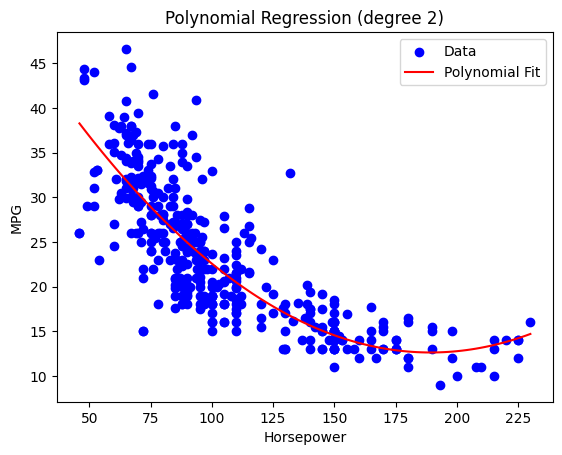

In [74]:
 # Visualize the results
 plt.scatter(X, y, color='blue', label='Data')
 X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 X_range_poly = poly.transform(X_range)
 y_range_pred = model.predict(X_range_poly)
 plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
 plt.xlabel('Horsepower')
 plt.ylabel('MPG')
 plt.legend()
 plt.title(f'Polynomial Regression (degree {degree})')
 plt.show()

In [76]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
 # Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 13.94
Root Mean Squared Error (RMSE): 3.73
R-squared (R²): 0.74
